### Universidade Federal do Rio Grande - FURG

### Escola de Engenharia - EE

### Programa de Pós-graduação em Engenharia Oceânica - PPGEO

### Disciplina: Confiabilidade em Engenharia

### Professor: Dr. Mauro de Vasconcellos Real

# __Aula 14__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import lognorm
from scipy.stats import gumbel_r
from scipy.stats import invweibull
from scipy import optimize
from scipy.special import gamma

# __Capítulo 7 - Confiabilidade e Projeto baseado em Confiabilidade__ <a name="section_6"></a>

[7.5 - Algoritmo de Hasofer-Lind-Rackwitz-Fiessler melhorado (iHLRF)](#section_75)  
[7.6 - Variáveis aleatórias correlacionadas](#section_76)  

## __7.5 - Algoritmo de Hasofer-Lind-Rackwitz-Fiessler melhorado (iHLRF)__  <a name="section_75"></a>

* O algoritmo de Hasofer-Lind-Rackwitz-Fiessler (HLRF), visto no item 7.3, pode ser aperfeiçoado através da utilização de uma busca linear para ajuste do tamanho do passo na direção do ponto de projeto $\textbf{x}^{\prime *}$, conforme ZHANG e DER KIUREGHIAN (1997) e SUDRET e DER KIUREGHIAN (2000).

* Inicialmente a direção de busca é dada pela equação abaixo, conforme o algoritmo HLRF original:

$$ \textbf{d}_k = \textbf{x}_{k+1}^{\prime} - \textbf{x}_{k}^{\prime} =   \frac{\left[\nabla{g}(\textbf{x}_{k}^{\prime})^{t}\textbf{x}_{k}^{\prime} - g(\textbf{x}_{k}^{\prime})\right]}{||\nabla{g}(\textbf{x}_k^{\prime})||^2}\nabla{g}(\textbf{x}_{k}^{\prime}) - \textbf{x}_{k}^{\prime}$$

* O novo ponto de projeto (ponto mais provável de falha) $\textbf{x}_{k+1}^{\prime}$ será dado por:

$$\textbf{x}_{k+1}^{\prime} = \textbf{x}_{k}^{\prime} + \lambda_k \textbf{d}_k$$

* Onde no algoritmo original o escalar $\lambda_k$, que regula o tamanho do passo na direção de busca do ponto de projeto, assume um valor unitário, ou seja, $\lambda_k = 1$.

* No algoritmo iHLRF ( sendo o _i_ do inglês _improved_ = melhorado) é introduzida uma busca linear por um passo ótimo $\lambda_k$, que minimiza uma função de mérito $m(\textbf{x}^{\prime})$, ou seja:

$$\lambda_k = \text{arg} \{ \text{min}[m(\textbf{x}_k^{\prime} + \lambda \textbf{d}_k)]\}$$


* Segundo BECK (2019) a busca linear é realizada de forma aproximada, utilizando a regra de Armijo, e impondo uma redução suficiente na função mérito dada por:

$$\lambda_k  = \text{max}[m(\textbf{x}_k^{\prime} + \lambda \textbf{d}_k) - m(\textbf{x}_k^{\prime}) \leq a b^n \nabla m(\textbf{x}_k^{\prime})^T \textbf{d}_k], \quad n \in \mathbb{N} \quad \text{e} \quad a, b \in (0,1)$$


* A função de mérito $m(\textbf{x}^{\prime})$, proposta por ZHANG e DER KIUREGHIAN (1997), é dada na forma:

$$m(\textbf{x}^{\prime}) = \frac{1}{2}||\textbf{x}^{\prime}||^2 + c|g(\textbf{x}^{\prime})|$$

* Esta função de mérito possui duas propriedades importantes:

1. A direção de busca $\textbf{d}_k$ é uma direção de descida da função de mérito, desde que:

$$c > \frac{||\textbf{x}^{\prime}||}{||\nabla g(\textbf{x}^{\prime})||}$$.


2. A convergência para o ponto de projeto é garantida, desde que seja mantida a mesma restrição ao escalar $c$.

* Segundo BECK (2019) estas duas propriedades são suficientes para garantir  a convergência incondicional para o ponto de projeto.

#### Algoritmo do método iHLRF (_improved_ HLRF):

0. Estabelecer os parâmetros: $a, b \in (0,1)$, $\epsilon > 0$, $\delta >0$ e $\gamma > 0$.

1. Escolher os valores iniciais para $\textbf{x}_0^{\prime}$, para $k = 0$.

2. Avaliação da função estado limite $g(\textbf{x}_k^{\prime})$ e de seu gradiente $\nabla g(\textbf{x}_k^{\prime})$ e verificação da condição de otimalidade. Se as condições de convergência abaixo forem satisfeitas o algoritmo é interrompido; caso contrário segue:

$$1 - \frac{|\nabla g(\textbf{x}_k^{\prime})^T \textbf{x}_k^{\prime}|}{||\nabla g(\textbf{x}_k^{\prime})|||| \textbf{x}_k^{\prime}||} < \epsilon \quad \text{e} \quad |g(\textbf{x}_k^{\prime})| < \gamma$$

3. Avaliação da direção de busca:

$$ \textbf{d}_k = \textbf{x}_{k+1}^{\prime} - \textbf{x}_{k}^{\prime} =   \frac{\left[\nabla{g}(\textbf{x}_{k}^{\prime})^{t}\textbf{x}_{k}^{\prime} - g(\textbf{x}_{k}^{\prime})\right]}{||\nabla{g}(\textbf{x}_k^{\prime})||^2}\nabla{g}(\textbf{x}_{k}^{\prime}) - \textbf{x}_{k}^{\prime}$$

4. Determinação do fator de penalidade da função de mérito. 

* Se $|g(\textbf{x}_k^{\prime})| > \gamma$:

$$c_k = \gamma \, \text{max} \left[\frac{||\textbf{x}_k^{\prime}||}{||\nabla{g}(\textbf{x}_{k}^{\prime})||}, \frac{1}{2}\frac{||\textbf{x}_{k}^{\prime}+\textbf{d}_k ||^2}{|g(\textbf{x}_{k}^{\prime})|}\right]$$

* Caso contrário:

$$c_k = \gamma \, \frac{||\textbf{x}_k^{\prime}||}{||\nabla g(\textbf{x}_k^{\prime})||}$$

5. Busca linear:

$$\lambda_k  = \text{max}[m(\textbf{x}_k^{\prime} + \lambda \textbf{d}_k) - m(\textbf{x}_k^{\prime}) \leq a b^n \nabla m(\textbf{x}_k^{\prime})^T \textbf{d}_k], \quad n \in \mathbb{N} \quad \text{e} \quad a, b \in (0,1)$$

6. Atualização do ponto de projeto $\textbf{x}^{\prime}$:

$$\textbf{x}_{k+1}^{\prime} = \textbf{x}_{k}^{\prime} + \lambda_k \textbf{d}_k$$

7. Incremento do número de iterações: $k = k + 1$ e retorno ao passo $2$.


##### Observações importantes para o funcionamento do algoritmo iHLRF:


1. Os parâmetros $\epsilon$ e $\delta$ correspondem à tolerância nas condições de otimalidade, podendo-se adotar os valores típicos: $\epsilon = 10^{-3}$ e $\delta = 10^{-3}|g(\textbf{x}_{0}^{\prime})|$, pois a tolerância $\delta$ depende da escala da função $g(\textbf{x}^{\prime})$.

2. Os valores usuais para os parâmetros $a$, $b$ e $\gamma$ são: $a = 0$, $b = 0,5$ e $\gamma = 2$.

3. Dentro do passo $4$, o valor fator de penalização $c_k$ é ajustado de modo  a equilibrar a eficiência e a convergência do algoritmo. Conforme BECK (2019), para $ |g(\textbf{x}_k^{\prime})| \geq \delta$, o segundo termo de ajuste dentro dos colchetes impõe um valor suficientemente grande para $c_k$ de forma que um passo inteiro, $(\lambda_k = 1)$, posso ser adotado, caso a função $g(\textbf{x}^{\prime})$ seja aproximadamente linear. Contudo, a adoção deste critério pode fazer com que o algoritmo perca a sua garantia de convergência condicional.

4. No passo $5$, o valor inicial de $n$ é geralmente igual a $0$.

### Exemplo 7.8 - Deflexão máxima em uma viga contínua - Solução com o algoritmo iHRLF

<img src="./images7/continuous_beam.jpg" alt="Viga_contínua" style="width:474px" />

* Este exemplo extraído de ROUDAK et al. (2017), trata da função estado limite da máxima deflexão em serviço de uma viga contínua de três vãos iguais a $7 m$, submetida a uma carga uniformemente distribuída $w$, dada na forma:

$$ g(\textbf{X}) = \frac{7}{360} - 360 \frac{w}{E h ^4}$$

* Onde:

* $w$ é a carga uniformemente distribuída em $kN/m$.

* $E$ é o módulo de elasticidade do material em $kN/m$.

* $h$ é altura da seção transversal em $m$.

* Admitindo-se que $w$, $E$ e $h$ possuem distribuição normal e são estatisticamente independentes.

* Parâmetros de projeto:

* $w$: $\mu_w = 10 kN/m$, $\delta_w = 0,04$ e $\sigma_w = 0,4 kN/m$

* $E$: $\mu_E = 2\times10^{7} kN/m^2$, $\delta_E = 0,25$ e $\sigma_E = 0,5\times10^{7} kN/m^2$

* $h$: $\mu_h= 0,4 m$, $\delta_h = 0,025$ e $\sigma_h = 0.01 m$

* __Solução 1: Método HRLF original__

* Ponto inicial $\textbf{x}_0 = \{w = 10 kN/m, E = 2\times10^{7} kN/m^2, h = 0,4 m\}^t$.

* Após 5 iterações, com uma tolerância $\epsilon = 1\times10^{-3}$, o algoritmo diverge e não é capaz de encontrar a resposta correta.

In [4]:
"""
Exemplo 7.8 - Deflexão em uma viga contínua - Algoritmo HLRF
"""
# Função estado limite:


def gfunction(xk):
    gx = 7./360. - 360. * xk[0] / (xk[1] * xk[2] ** 4)
    return gx


# Dados de entrada
mu_x = np.array([10.00, 2.00e7, 0.40])
sigma_x = np.array([0.40, 0.50e7, 0.01])
D = sigma_x * np.eye(3)
Jxx1 = np.copy(D)
Jx1x = np.linalg.inv(D)

# Valores iniciais:
xk1 = np.copy(mu_x)
#
errox = 1000.00
errog = 1000.00
iter = -1
toler = 1.00e-3
epsilon = toler
delta = toler * np.abs(gfunction(xk1))
eps = 1.00e-6
max_iter = 100
# Processo iterativo:
while (errox > epsilon or errog > delta) and iter < max_iter:
    iter += 1
    xk = np.copy(xk1)
    # Transformação de xk para x'k:
    x1k= Jx1x.dot(xk-mu_x)
    normx1k = np.linalg.norm(x1k)
    # Cálculo de g(xk):
    gxk = gfunction(xk)
    # Cálculo do gradiente de xk
    gradxk = optimize.approx_fprime(xk, gfunction, eps)
    # Cálculo das derivadas parciais em relação a x'k
    gradx1k = np.transpose(Jxx1).dot(gradxk)
    normgradx1k = np.linalg.norm(gradx1k)
    # Cálculo dos cossenos diretores alpha:
    alpha = gradx1k / normgradx1k
    # Atualização do ponto de projeto xk através do algorítimo HLRF:
    x1k1 = ((np.dot(gradx1k, x1k) - gxk) / normgradx1k ** 2) * gradx1k 
    # Transformação de x1k1 para xk1
    xk1 = mu_x + Jxx1.dot(x1k1)
    # Teste de convergência:
    prod = normgradx1k * normx1k
    # Cálculo do erro no vetor x'k
    if np.abs(prod) > eps:
        errox = 1. - np.abs(np.dot(gradx1k, x1k) / (normgradx1k * normx1k))
    else:
        errox = 1000.00
    # Cálculo do erro na função estado limite g(x)
    errog = np.abs(gfunction(xk1))
    beta = np.linalg.norm(x1k1)
    print("Iter = {0:0d}, Beta = {1:0.4f}, erro(x') ={2:0.4f}, erro(g) ={2:0.4f}".format(iter, beta, errox, errog))
    for i in range(3):
        print(" x'[{0:0d}]  = {1:0.4f}, x[{0:0d}]  = {2:0.4f}, alpha[{0:0d}]  = {3:0.4f}".format(i,x1k1[i],xk1[i],alpha[i]))
    if iter >1 and errox == 1000: break
    

Iter = 0, Beta = 6.4675, erro(x') =1000.0000, erro(g) =1000.0000
 x'[0]  = 0.9477, x[0]  = 10.3791, alpha[0]  = -0.1465
 x'[1]  = -5.9428, x[1]  = -9713980.4144, alpha[1]  = 0.9189
 x'[2]  = -2.3693, x[2]  = 0.3763, alpha[2]  = 0.3663
Iter = 1, Beta = 9.0648, erro(x') =0.1866, erro(g) =0.1866
 x'[0]  = -0.6599, x[0]  = 9.7360, alpha[0]  = 0.0728
 x'[1]  = -8.8556, x[1]  = -24278104.1140, alpha[1]  = 0.9769
 x'[2]  = 1.8201, x[2]  = 0.4182, alpha[2]  = -0.2008
Iter = 2, Beta = 30.9446, erro(x') =0.0318, erro(g) =0.0318
 x'[0]  = -5.5049, x[0]  = 7.7980, alpha[0]  = 0.1779
 x'[1]  = -27.6228, x[1]  = -118114159.0837, alpha[1]  = 0.8927
 x'[2]  = 12.8157, x[2]  = 0.5282, alpha[2]  = -0.4142
Iter = 3, Beta = 626.4938, erro(x') =0.1527, erro(g) =0.1527
 x'[0]  = -298.3379, x[0]  = -109.3351, alpha[0]  = 0.4762
 x'[1]  = -330.8544, x[1]  = -1634272154.0762, alpha[1]  = 0.5281
 x'[2]  = 440.4819, x[2]  = 4.8048, alpha[2]  = -0.7031
Iter = 4, Beta = 47327539.0101, erro(x') =1000.0000, erro(g) 

* __Solução 2:__

* Ponto inicial $\textbf{x}_0 = \{w = 10 kN/m, E = 2\times10^{7} kN/m^2, h = 0,4 m\}^t$.

* Após 4 iterações, com uma tolerância $\epsilon = 1\times10^{-3}$, o algoritmo converge para a resposta correta com $\beta = 2,52$.

* Ponto de falha $\textbf{x}^*$: $w^* = 10,06 kN/m$, $E^*=7.553.267 kN/m^2$ e $h^* = 0,3962 m$.

In [7]:
"""
Exemplo 7.8 - Deflexão em uma viga contínua - Algoritmo iHLRF = HRLF melhorado
"""

import numpy as np
from scipy import optimize


# Função estado limite:


def gfunction(xk):
    gx = 7. / 360. - 360. * xk[0] / (xk[1] * xk[2] ** 4)
    return gx


#
# Função de penalidade m(x') para o algoritmo iHRLF
#

def mfunc(normy, g, c):
    my = 1. / 2. * normy ** 2 + c * np.abs(g)
    return my


# Dados de entrada
mu_x = np.array([10.00, 2.00e7, 0.40])
sigma_x = np.array([0.40, 0.50e7, 0.01])
D = sigma_x * np.eye(3)
Jxx1 = np.copy(D)
Jx1x = np.linalg.inv(D)

# Valores iniciais:
xk1 = np.copy(mu_x)
#
errox = 1000.00
errog = 1000.00
iter = -1
toler = 1.00e-3
epsilon = toler
delta = toler * np.abs(gfunction(xk1))
eps = 1.00e-6
max_iter = 100
# Processo iterativo:
while (errox > epsilon or errog > delta) and iter < max_iter:
    iter += 1
    xk = np.copy(xk1)
    # Transformação de xk para x'k:
    x1k = Jx1x.dot(xk - mu_x)
    normx1k = np.linalg.norm(x1k)
    # Cálculo de g(xk):
    gxk = gfunction(xk)
    # Cálculo do gradiente de xk
    gradxk = optimize.approx_fprime(xk, gfunction, eps)
    # Cálculo das derivadas parciais em relação a x'k
    gradx1k = np.transpose(Jxx1).dot(gradxk)
    normgradx1k = np.linalg.norm(gradx1k)
    # Cálculo dos cossenos diretores alpha:
    alpha = gradx1k / normgradx1k
    # Atualização do ponto de projeto xk através do algorítimo HLRF:
    dk = ((np.dot(gradx1k, x1k) - gxk) / normgradx1k ** 2) * gradx1k - x1k
    lambdak = 1.00
    x1k1 = x1k + lambdak * dk
    #
    # Parâmetros of iHLRF method
    #
    iHLRF = True
    if iHLRF:
        gamma0 = 2.0
        a = 0.1
        b = 0.5
        #
        normx1k = np.linalg.norm(x1k)
        normx1k1 = np.linalg.norm(x1k1)
        erro2 = gxk
        c1 = normx1k / normgradx1k
        #
        if erro2 > delta:
            c2 = 0.5 * normx1k1 ** 2 / np.abs(gxk)
            ck = gamma0 * np.max([c1, c2])
        else:
            ck = gamma0 * c1
        #
        k = -1
        f1 = 1.00
        f2 = 0.00
        while f1 > f2 and k < 10:
            k += 1
            lambdak = b ** k
            x1k1 = x1k + lambdak * dk
            xk1 = mu_x + Jxx1.dot(x1k1)
            gxk1 = gfunction(xk1)
            normx1k1 = np.linalg.norm(x1k1)
            f1 = mfunc(normx1k1, gxk1, ck) - mfunc(normx1k, gxk, ck)
            gradm = x1k + ck * gradx1k * np.sign(gxk)
            normgradm = np.linalg.norm(gradm)
            f2 = a * lambdak * np.dot(gradm, dk)
    #
    x1k1 = x1k + lambdak * dk
    # Transformação de x1k1 para xk1
    xk1 = mu_x + Jxx1.dot(x1k1)
    # Teste de convergência:
    prod = normgradx1k * normx1k
    # Cálculo do erro no vetor x'k
    if np.abs(prod) > eps:
        errox = 1. - np.abs(np.dot(gradx1k, x1k) / (normgradx1k * normx1k))
    else:
        errox = 1000.00
    # Cálculo do erro na função estado limite g(x)
    errog = np.abs(gfunction(xk1))
    beta = np.linalg.norm(x1k1)
    print("Iter = {0:0d}, Beta = {1:0.4f}, erro(x') ={2:0.4f}, erro(g) ={2:0.4f}".format(iter, beta, errox, errog))
    for i in range(3):
        print(" x'[{0:0d}]  = {1:0.4f}, x[{0:0d}]  = {2:0.4f}, alpha[{0:0d}]  = {3:0.4f}".format(i,x1k1[i],xk1[i],alpha[i]))
    if iter > 1 and errox == 1000: break

Iter = 0, Beta = 1.6169, erro(x') =1000.0000, erro(g) =1000.0000
 x'[0]  = 0.2369, x[0]  = 10.0948, alpha[0]  = -0.1465
 x'[1]  = -1.4857, x[1]  = 12571504.8964, alpha[1]  = 0.9189
 x'[2]  = -0.5923, x[2]  = 0.3941, alpha[2]  = 0.3663
Iter = 1, Beta = 2.3595, erro(x') =0.0095, erro(g) =0.0095
 x'[0]  = 0.2682, x[0]  = 10.1073, alpha[0]  = -0.0962
 x'[1]  = -2.2436, x[1]  = 8782234.3469, alpha[1]  = 0.9644
 x'[2]  = -0.6797, x[2]  = 0.3932, alpha[2]  = 0.2465
Iter = 2, Beta = 2.5516, erro(x') =0.0078, erro(g) =0.0078
 x'[0]  = 0.1745, x[0]  = 10.0698, alpha[0]  = -0.0684
 x'[1]  = -2.5058, x[1]  = 7470819.9370, alpha[1]  = 0.9821
 x'[2]  = -0.4485, x[2]  = 0.3955, alpha[2]  = 0.1758
Iter = 3, Beta = 2.5220, erro(x') =0.0004, erro(g) =0.0004
 x'[0]  = 0.1478, x[0]  = 10.0591, alpha[0]  = -0.0586
 x'[1]  = -2.4893, x[1]  = 7553266.9958, alpha[1]  = 0.9871
 x'[2]  = -0.3763, x[2]  = 0.3962, alpha[2]  = 0.1492


[Retornar ao início da aula](#section_6)

### Exemplo 7.9 - Capacidade de carga de viga no regime plástico - Solução com o algoritmo iHRLF

<img src="./images7/momento_plastico.jpg" alt="Momento Plástico" style="width:474px" />

* O momento plástico (capacidade resistente última no regime plástico) de uma seção de uma viga de aço pode ser dado por: $M_p = YZ$

* Onde:

* $Y$ é a tensão de escoamento do aço.

* $Z$ é o módulo plástico da seção transversal.

* Se $M$ é o momento solicitante, a função performance será definida como: $g(\textbf{X}) = YZ - M$

* Admitindo-se que $Y$, $Z$ e $M$ são estatisticamente indenpendentes.

* A __diferença em relação ao Exemplo 7.5__ está em que agora as variáveis $Y$, $Z$ e $M$ possuem __distribuição de probabilidade diferente da normal__.

* Parâmetros de projeto:

* $Y$: distribuição lognormal - $\mu_Y = 40 kN/cm^2$, $\delta_Y = 0,125$ e $\sigma_Y = 5 kN/cm^2$

* $Z$: distribuição lognormal -$\mu_Z = 50 cm^3$, $\delta_Z = 0,05$ e $\sigma_Z = 2,5 m^3$

* $M$: distribuição de valores extremos do tipo I - Gumbel - $\mu_M= 1.000 kNcm$, $\delta_M = 0,20$ e $\sigma_M = 200 kNcm$


* O algoritmo converge para a solução correta após 4 iterações com $\beta = 2,74$.

In [6]:
"""
Exemplo 7.9 - Capacidade de cargas em vigas no regime plástico - Algoritmo iHLRF
"""
import numpy as np
from scipy import optimize
from scipy.stats import norm

# Função estado limite:


def gfunction(xk):
    gx = xk[0] * xk[1] - xk[2]
    return gx

#
# Função de penalidade m(x') para o algoritmo iHRLF
#

def mfunc(normy, g, c):
    my = 1. / 2. * normy ** 2 + c * np.abs(g)
    return my

# Dados de entrada
mu_x = np.array([40.00, 50.00, 1000.00])
sigma_x = np.array([5.00, 2.50, 200.00])


# Valores iniciais:
xk1 = np.array([40.00, 50.00, 1000.00])
#
errox = 1000.00
errog = 1000.00
iter = -1
toler = 1.00e-3
epsilon = toler
delta = toler * np.abs(gfunction(xk1))
eps = 1.00e-6
max_iter = 100
# Processo iterativo:
while (errox > epsilon or errog > delta) and iter < max_iter:
    iter += 1
    xk = np.copy(xk1)
    # Variáveis normais equivalentes
    # Y = lognormal
    y = xk[0]
    mu_y = mu_x[0]
    sigma_y = sigma_x[0]
    zeta_y = np.sqrt(np.log(1.00 + (sigma_y / mu_y) ** 2))
    lambda_y = np.log(mu_y) - 0.5 * zeta_y ** 2
    sigma_yn = zeta_y * y
    mu_yn = y * (1.00 - np.log(y) + lambda_y)
    # Z = lognormal
    z = xk[1]
    mu_z = mu_x[1]
    sigma_z = sigma_x[1]
    zeta_z = np.sqrt(np.log(1.00 + (sigma_z / mu_z) ** 2))
    lambda_z = np.log(mu_z) - 0.5 * zeta_z ** 2
    sigma_zn = zeta_z * z
    mu_zn = z * (1.00 - np.log(z) + lambda_z)
    # M = valores extremos tipo I - Gumbel
    m = xk[2]
    mu_m = mu_x[2]
    sigma_m = sigma_x[2]
    alpha_m = np.pi / np.sqrt(6) / sigma_m
    u_m = mu_m - np.euler_gamma / alpha_m
    fdp_m = alpha_m * np.exp(-alpha_m * (m - u_m)) * np.exp(-np.exp(-alpha_m * (m - u_m)))
    fdpa_m = np.exp(-np.exp(-alpha_m * (m - u_m)))
    zm = norm.ppf(fdpa_m, 0, 1)
    fdp_nzm = norm.pdf(zm, 0, 1)
    sigma_mn = fdp_nzm / fdp_m
    mu_mn = m - sigma_mn * zm
    # Transformação de xk para x'k:
    mu_xn = np.array([mu_yn, mu_zn, mu_mn])
    sigma_xn = np.array([sigma_yn, sigma_zn, sigma_mn])
    D = sigma_xn * np.eye(3)
    Jxx1 = np.copy(D)
    Jx1x = np.linalg.inv(D)
    x1k = Jx1x.dot(xk - mu_xn)
    normx1k = np.linalg.norm(x1k)
    # Cálculo de g(xk):
    gxk = gfunction(xk)
    # Cálculo do gradiente de xk
    gradxk = optimize.approx_fprime(xk, gfunction, eps)
    # Cálculo das derivadas parciais em relação a x'k
    gradx1k = np.transpose(Jxx1).dot(gradxk)
    normgradx1k = np.linalg.norm(gradx1k)
    # Cálculo dos cossenos diretores alpha:
    alpha = gradx1k / normgradx1k
    # Atualização do ponto de projeto xk através do algorítimo HLRF:
    dk = ((np.dot(gradx1k, x1k) - gxk) / normgradx1k ** 2) * gradx1k - x1k
    lambdak = 1.00
    x1k1 = x1k + lambdak * dk
    #
    # Parâmetros of iHLRF method
    #
    iHLRF = True
    if iHLRF:
        gamma0 = 2.0
        a = 0.1
        b = 0.5
        #
        normx1k = np.linalg.norm(x1k)
        normx1k1 = np.linalg.norm(x1k1)
        erro2 = gxk
        c1 = normx1k / normgradx1k
        #
        if erro2 > delta:
            c2 = 0.5 * normx1k1 ** 2 / np.abs(gxk)
            ck = gamma0 * np.max([c1, c2])
        else:
            ck = gamma0 * c1
        #
        k = -1
        f1 = 1.00
        f2 = 0.00
        while f1 > f2 and k < 10:
            k += 1
            lambdak = b ** k
            x1k1 = x1k + lambdak * dk
            xk1 = mu_xn + Jxx1.dot(x1k1)
            gxk1 = gfunction(xk1)
            normx1k1 = np.linalg.norm(x1k1)
            f1 = mfunc(normx1k1, gxk1, ck) - mfunc(normx1k, gxk, ck)
            gradm = x1k + ck * gradx1k * np.sign(gxk)
            normgradm = np.linalg.norm(gradm)
            f2 = a * lambdak * np.dot(gradm, dk)
    #
    x1k1 = x1k + lambdak * dk
    # Transformação de x1k1 para xk1
    xk1 = mu_xn + Jxx1.dot(x1k1)
    # Teste de convergência:
    prod = normgradx1k * normx1k
    # Cálculo do erro no vetor x'k
    if np.abs(prod) > eps:
        errox = 1. - np.abs(np.dot(gradx1k, x1k) / (normgradx1k * normx1k))
    else:
        errox = 1000.00
    # Cálculo do erro na função estado limite g(x)
    errog = np.abs(gfunction(xk1))
    beta = np.linalg.norm(x1k1)
    print("Iter = {0:0d}, Beta = {1:0.4f}, erro(x') ={2:0.4f}, erro(g) ={2:0.4f}".format(iter, beta, errox, errog))
    for i in range(3):
        print(" x'[{0:0d}]  = {1:0.4f}, x[{0:0d}]  = {2:0.4f}, alpha[{0:0d}]  = {3:0.4f}".format(i,x1k1[i],xk1[i],alpha[i]))
    if iter > 1 and errox == 1000: break


Iter = 0, Beta = 3.0831, erro(x') =0.7453, erro(g) =0.7453
 x'[0]  = -2.3302, x[0]  = 28.0842, alpha[0]  = 0.7558
 x'[1]  = -0.9351, x[1]  = 47.6013, alpha[1]  = 0.3033
 x'[2]  = 1.7893, x[2]  = 1308.2627, alpha[2]  = -0.5804
Iter = 1, Beta = 2.8073, erro(x') =0.1669, erro(g) =0.1669
 x'[0]  = -1.3167, x[0]  = 33.1947, alpha[0]  = 0.4690
 x'[1]  = -0.5284, x[1]  = 48.6253, alpha[1]  = 0.1882
 x'[2]  = 2.4224, x[2]  = 1608.8677, alpha[2]  = -0.8629
Iter = 2, Beta = 2.7433, erro(x') =0.0058, erro(g) =0.0058
 x'[0]  = -1.1853, x[0]  = 34.2286, alpha[0]  = 0.4321
 x'[1]  = -0.4757, x[1]  = 48.7645, alpha[1]  = 0.1734
 x'[2]  = 2.4279, x[2]  = 1668.9973, alpha[2]  = -0.8850
Iter = 3, Beta = 2.7422, erro(x') =0.0000, erro(g) =0.0000
 x'[0]  = -1.1731, x[0]  = 34.2968, alpha[0]  = 0.4278
 x'[1]  = -0.4708, x[1]  = 48.7766, alpha[1]  = 0.1717
 x'[2]  = 2.4335, x[2]  = 1672.8800, alpha[2]  = -0.8874


[Retornar ao início da aula](#section_6)

## __7.6 - Variáveis aleatórias correlacionadas (iHLRF)__  <a name="section_76"></a>

* As equações vistas até aqui para o cálculo do índice de confiabilidade $\beta$ somente são válidas para __variáveis estatisticamente indepependentes__, ou seja, __variáveis não-correlacionadas__ $X_1, X_2,..., X_n$.

* Se as variáveis originais forem correlacionadas, é necessário transformá-las em um conjunto de variáveis padronizadas não-correlacionadas $Y_1, Y_2,..., Y_n$, para depois realizar-se o cálculo de $\beta$.

### 7.6.1 - Transformação de Rosenblatt

* Segundo BECK (2019) esta transformação poderia ser feita utilizando-se a __transformação de Rosenblatt__, de forma a preservar o conteúdo de probabilidade acumulada correspondente, quando se passa do espaço das variáveis aleatórias originais $\mathbb{X}$, para o espaço das variáveis padronizadas independentes $\mathbb{Y}$:

$$\begin{array}{l} \Phi(y_1) = F_1(x_1) \\
                       \Phi(y_2) = F_2(x_2|x_1)  \\
                       ...   \\
                       \Phi(y_n) = F_n(x_n|x_1, x_2,...,x_{n-1})  \\ \end{array} $$
                       
* Sendo $F_2(x_2|x_1)$ a função densidade de probabilidade acumulada condicional de $x_2$, dada a ocorrência de $x_1$, e $\Phi(y_2)$ função densidade de probabilidade acumulada de uma variável normal padronizada $y_2$, estatisticamente independente, e assim sucessivamente.

* Então, o conjunto de variáveis padronizadas $\textbf{Y}$, estatisticamente independentes poderia ser obtido a partir de:

$$\begin{array}{l} y_1 = \Phi^{-1}[F_1(x_1)] \\
                       y_2 = \Phi^{-1}[F_2(x_2|x_1)]  \\
                       ...   \\
                       y_n = \Phi^{-1}[F_n(x_n|x_1, x_2,...,x_{n-1})]  \\ \end{array} $$
                       
* A principal dificuldade deste procedimento está em que a forma analítica destas funções de densidade de  probabilidade acumulada condicionais normalmente não se encontra disponível, além do que, se o número de variáveis aleatórias $n$ for grande, o problema torna-se intratável.

* Para o leitor interessado, um exemplo de aplicação da transformação de Rosenblatt para um caso bidimensional se encontra exposto em MELCHERS e BECK (2018).

### 7.6.2 - Transformação composta empregando o modelo de Nataf

* Uma forma prática de realizar-se esta transformação é a realização de uma transformação composta utilizando-se o modelo Nataf, com base no tipo de distribuição de probabilidade, média, variância e coeficientes de correlação entre as variáveis aleatórias originais.

* Esta transformação é dita composta, pois é constituída por três etapas:

1. Transformar o conjunto de variáveis originais correlacionadas $\textbf{X}$ em um conjunto de variáveis  normais padronizadas equivalentes $\textbf{X}^{\prime}$ (também correlacionadas).

2. Determinar os coeficientes de correlação linear entre as variáveis normais equivalentes padronizadas $\textbf{X}^{\prime}$ empregando-se o __modelo de Nataf__ .

3. Eliminação da correlação das variáveis normais padronizadas $\textbf{X}^{\prime}$, empregando a decomposição ortogonal da matriz de correlação ou através da fatorização de Cholesky da matriz de correlação, transformando-as em um conjunto de variáveis normais padronizadas estatisticamente independentes $\textbf{Y}$.

* Esta transformação composta de três etapas é ilustrada pela figura abaixo.

* Na figura da esquerda tem-se a distribuição de probabilidade conjunta de duas variáveis lognormais $X_1$ e $X_2$, sendo $\mu_{X_1} = 1,00$ e $\sigma_{X_1}=0,50$; e $\mu_{X_2} = 1,00$ e $\sigma_{X_2}=0,25$. Observe-se que o formato de uma concha marinha se deve à distribuição das variáveis ser lognormal. Estas variáveis possuem um coeficiente de correlação $\rho_{X_1,X_2} = 0,5$.

* Na figura central tem-se a distribuição de probabilidade conjunta de duas variáveis normais padronizadas $X_1^{\prime}$ e $X_2^{\prime}$, sendo $\mu_{{X_1}^{\prime}} = 0,00$ e $\sigma_{{X_1}^{\prime}}=1,00$; e $\mu_{{X_2}^{\prime}} = 0,00$ e $\sigma_{{X_2}^{\prime}}=1,00$. Contudo, as variáveis $X_1^{\prime}$ e $X_2^{\prime}$ ainda possuem um coeficiente de correlação $\rho_{X_1^{\prime},X_2^{\prime}} = 0,5$, sendo, portanto, ainda correlacionadas.

* Na figura da direita tem-se a distribuição de probabilidade conjunta de duas variáveis normais padronizadas $Y_1$ e $Y_2$, sendo $\mu_{Y_1} = 0,00$ e $\sigma_{Y_1}=1,00$; e $\mu_{Y_2} = 0,00$ e $\sigma_{Y_2}=1,00$. Agora tem-se que o coeficiente de correlação $\rho_{Y_1,Y_2} = 0,00$, sendo, portanto, estatisticamente independentes.

* A primeira etapa desta tranformação pode ser feita através da formulação exposta no item 7.3, que trata do método FORM. A seguir serão estudadas as etapas 2 e 3.

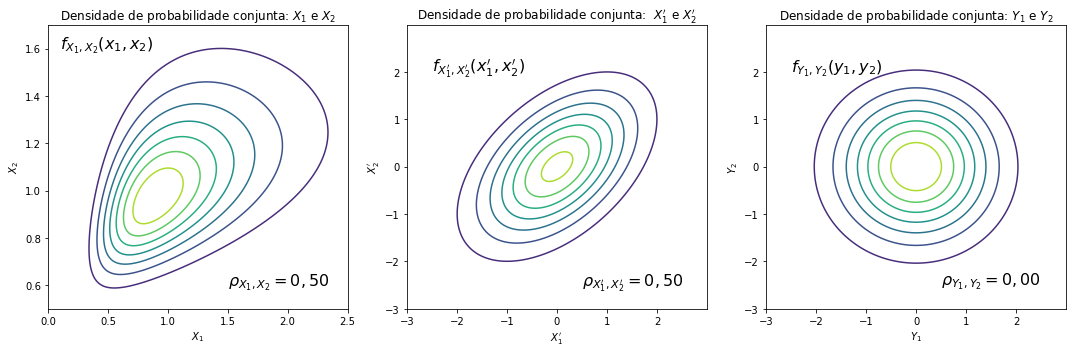

In [8]:
"""
Geração de variáveis normais correlacionadas
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


x, y = np.mgrid[0.01:2.5:0.01, 0.4:1.7:0.01]
pos = np.dstack((np.log(x), np.log(y)))
mu_x = 1.00
sigma_x = 0.50
delta_x = 0.50
mu_y = 1.00
sigma_y = 0.250
delta_y = 0.250
zeta_x = np.sqrt(np.log(1 + delta_x ** 2))
lambda_x = np.log(mu_x) - 0.5 * zeta_x ** 2
x_m = mu_x / (1 + delta_x ** 2)
zeta_y = np.sqrt(np.log(1 + delta_y ** 2))
lambda_y = np.log(mu_y) - 0.5 * zeta_y ** 2
y_m = mu_x / (1 + delta_y ** 2)
rho_xy = 0.5
f = np.log(1 + rho_xy * delta_x * delta_y) / (rho_xy * np.sqrt(np.log(1 + delta_x ** 2) * np.log(1 + delta_y ** 2)))
rv = multivariate_normal([lambda_x, lambda_y], [[zeta_x ** 2, rho_xy * zeta_x * zeta_y],
                                                [rho_xy * zeta_x * zeta_y, zeta_y ** 2]])
plt.rcParams['figure.figsize'] = 15, 5
fig1 = plt.figure()
ax1 = fig1.add_subplot(131)
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title(r'Densidade de probabilidade conjunta: $X_1$ e $X_2$')
ax1.set_xlim(0, 2.5)
ax1.set_ylim(0.5, 1.70)
ax1.text(0.1, 1.6, r"$f_{X_1,X_2}(x_1,x_2)$", fontsize=16)
ax1.text(1.5, 0.6, r"$\rho_{X_1,X_2} = 0,50$", fontsize=16)
ax1.contour(x, y, rv.pdf(pos))

x, y = np.mgrid[-3:3:0.01, -3:3:0.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, rho_xy], [rho_xy, 1]])
ax2 = fig1.add_subplot(132)
plt.xlabel(r"$X_1^{\prime}$")
plt.ylabel(r"$X_2^{\prime}$")
plt.title(r'Densidade de probabilidade conjunta:  $X_1^{\prime}$ e $X_2^{\prime}$')
ax2.text(-2.5, 2.0, r"$f_{X_1^{\prime},X_2^{\prime}}(x_1^{\prime},x_2^{\prime})$", fontsize=16)
ax2.text(0.5, -2.5, r"$\rho_{X_1^{\prime},X_2^{\prime}} = 0,50$", fontsize=16)
ax2.contour(x, y, rv.pdf(pos))


x, y = np.mgrid[-3:3:0.01, -3:3:0.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])
ax3 = fig1.add_subplot(133)
plt.xlabel(r"$Y_1$")
plt.ylabel(r"$Y_2$")
plt.title(r'Densidade de probabilidade conjunta: $Y_1$ e $Y_2$')
ax3.text(-2.5, 2.0, r"$f_{Y_1,Y_2}(y_1,y_2)$", fontsize=16)
ax3.text(0.5, -2.5, r"$\rho_{Y_1,Y_2} = 0,00$", fontsize=16)
ax3.contour(x, y, rv.pdf(pos))

plt.tight_layout()
plt.show()

### 7.6.3 - O modelo de Nataf

* Agora trata-se de resolver a segunda etapa da transformação, ou seja, obter a matriz de correlação entre as variáveis padronizadas $\textbf{R}_{Z}$.

* A matriz de covariância entre as variáveis aleatórias correlacionadas $X_1, X_2,..., X_n$ será dada por:

$$ \textbf{C} = \left[ \begin{array}{cccc} \sigma_{X_1}^2 & Cov(X_1, X_2) & Cov(X_1, X_3) & ... & Cov(X_1, X_n)  \\
                                            Cov(X_2, X_1) & \sigma_{X_2}^2 & Cov(X_2, X_3) & ... & Cov(X_2, X_n)  \\
                                           ... & ... & ... & ... & ...   \\
                                             Cov(X_n, X_1)& Cov(X_n, X_2) & Cov(X_n, X_3) & ... &  \sigma_{X_n}^2  \\ \end{array} \right]$$
                                             
* A covariância entre duas variáveis padronizadas $X_i^{\prime}$ e $X_j^{\prime}$ será igual ao coeficiente de correlação entre as variáveis originais $X_i$ e $X_j$:

$$Cov(X_i^{\prime}, X_j^{\prime}) = E[(X_i^{\prime}-\mu_{X_i^{\prime}})(X_j^{\prime}-\mu_{X_j^{\prime}})]$$

$$Cov(X_i^{\prime}, X_j^{\prime}) = \frac{E[(X_i-\mu_{X_i})(X_j-\mu_{X_j})]}{\sigma_{X_i} \sigma_{X_j}}$$

$$Cov(X_i^{\prime}, X_j^{\prime}) = \rho_{X_i,X_j}$$

* Logo a matriz de covariância das variáveis padronizadas $\textbf{C}^{\prime}$ corresponde à matriz de correlação das variáveis originais $\textbf{R}_{X}$:

$$ \textbf{C}^{\prime} = \left[ \begin{array}{cccc} 1 & \rho_{12} & \rho_{13} & ... & \rho_{1n}  \\
                                            \rho_{21} & 1 & \rho_{23} & ... & \rho_{2n}  \\
                                           ... & ... & ... & ... & ...   \\
                                             \rho_{n1} & \rho_{n2} & \rho_{n3} & ... &  1  \\ \end{array} \right] = \textbf{R}_{X} $$
                                             
* Uma vez conhecida a matriz de correlação entre as variáveis originais $\textbf{R}_{X}$, trata-se de obter a matriz $\textbf{R}_{Z}$, o que pode ser feito através do __modelo de Nataf__ conforme exposto em BECK (2019). 

* Em LIU e DER KIUREGHIAN (1986) se encontram fórmulas analíticas aproximadas que permitem calcular o coeficiente de correlação $\rho_{Z_i,Z_j}$, a partir do coeficiente de correlação $\rho_{X_i,X_j}$ e das distribuição de probabilidade das variáveis originais $X_i$ e $X_i$.

* É possível definir-se a razão entre os coeficientes de correlação linear:

$$r_{ij} = \frac{\rho_{Z_i,Z_j}}{\rho_{X_i,X_j}}$$

* Ainda conforme BECK (2019), em geral, os valores de $r_{ij}$ são próximos da unidade situando-se normalmente no intervalor  $0,9 \leq r_{ij} \leq 1,1$. Como usualmente os coeficiente de correlação entre duas variáveis $X_i$ e $X_j$ são estabelecidos de forma subjetiva, ou ainda com base em poucos dados experimentais, é aceitável que os valores de $\rho_{Z_i,Z_j}$ sejam aproximados diretamente pelos valores de $\rho_{X_i,X_j}$. Contudo, é importante salientar a diferença teórica entre $\rho_{Z_i,Z_j}$ e $\rho_{X_i,X_j}$.

### 7.6.4 - Decomposição ortogonal da matriz de correlação

### 7.6.5 - Decomposição de Cholesky da matriz de correlação

### 7.6.6 - Algoritmo FORM para variáveis correlacionadas

## __Bibliografia__

* __Livros__
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume I:  basic principles. New  York, John Wiley & Sons, 1975.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume II: decision, risk and reliability. New  York, John Wiley & Sons, 1984.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.
* BECK, A. T. Confiabilidade e segurança das  estruturas. Rio de Janeiro, Elsevier, 2019.
* HALDAR, A. MAHADEVAN, S. Probability, reliability, and statistical methods in engineering design. New York, Wiley, 2000.
* MELCHERS, R.E., BECK, A. T.; Structural reliability analysis and prediction. 3rd ed. John Wiley and Sons, 2018, 514p.
* __Artigos__
* HASOFER, A.M.; LIND, N.C.; 1974: Exact and Invariant Second Moment Code Format, J. Eng. Mech. ASCE 100, 111-121.
* LIU, P-L.; DER KIUREGHIAN, A. Multivariate distribution models with prescribed marginals and covariances. Probabilistic Engineering Mechanics, 1986, v.1, n.2, p.105-112.
* RACKWITZ R.; FIESSLER, B.; 1978: Structural Reliability Under Combined Load Sequences, Computers & Structures 9,489-494.
* ROUDAK, M.A.; SHAYANFAR, M.A.; BARKHORDARI, M.A.; KARAMLOO, M.; 2017: A robust approximation method for nonlinear cases of structural reliability analylis. International Journal of Mechanical Sciences, 133, 11-20.  

[Retornar ao início da aula](#section_6)